## Titanic - Machine Learning from Disaster

One of the main objectives of this project is to predict the survival on the Titanic and also get more familiar  with ML basics 


### Problem Statement 
The sinking of the RMS Titanic was a tragedy that resulted in significant loss of life, raising questions about the factors that influenced survival during the disaster. With limited lifeboats available, survival was not only a matter of chance but may have been influenced by individual characteristics such as age, gender, and socio-economic class.

This project aims to build a predictive model using passenger data to answer the question:
“What factors most significantly determined a passenger’s likelihood of survival during the Titanic disaster?”

By analyzing data on passenger demographics and other characteristics, the goal is to uncover patterns and insights that can provide a better understanding of survival dynamics in crisis situations.



### Objectives

1. Build a Predictive Model
Develop a machine learning model to predict the likelihood of survival for passengers based on demographic and socio-economic data.

2. Identify Key Factors
Analyze the impact of variables such as age, gender, socio-economic class, and others to determine the most significant predictors of survival.

3. Understand Survival Patterns
Uncover trends and relationships within the data that reveal how different groups of passengers were affected during the disaster.

4. Provide Insights for Crisis Preparedness
Leverage findings to contribute to discussions on safety and evacuation protocols in similar crisis scenarios.

5. Enhance Data Science Skills
Apply data preprocessing, exploratory data analysis, feature engineering, and model evaluation techniques to a real-world dataset.

In [2]:
#import libraries to be used in the project
import pandas as pd
import numpy as np 

c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# load the dataset 
data = pd.read_csv("Data/train.csv", index_col= False)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#check data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the output above, there are 12 coulmsns and some columns have null values such as in age and cabin. The datatypes in the dataset have both numerical and categorical values

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#let us handle the null values 
data.isnull().sum() / len(data) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
#the cabin column has ~ 77% of the rows missing values, I will drop that column as it wont have much of a 
#significance 
data.drop('Cabin', axis=1, inplace=True)


In [8]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [9]:
 #impute the age column with the median value 
data['Age'].fillna(data['Age'].median(), inplace= True)

In [10]:
#impute the rows in the embarked  column with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace= True)

In [11]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic_data = data

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## EDA

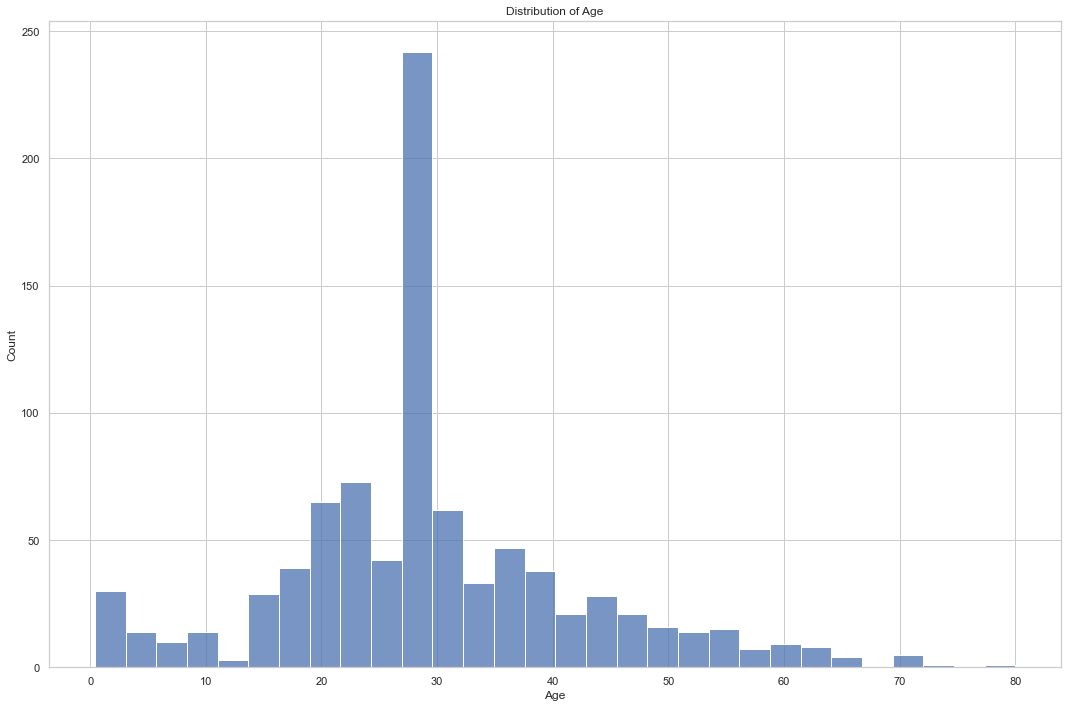

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Age'])
plt.title(f'Distribution of Age')
plt.tight_layout()
plt.show()

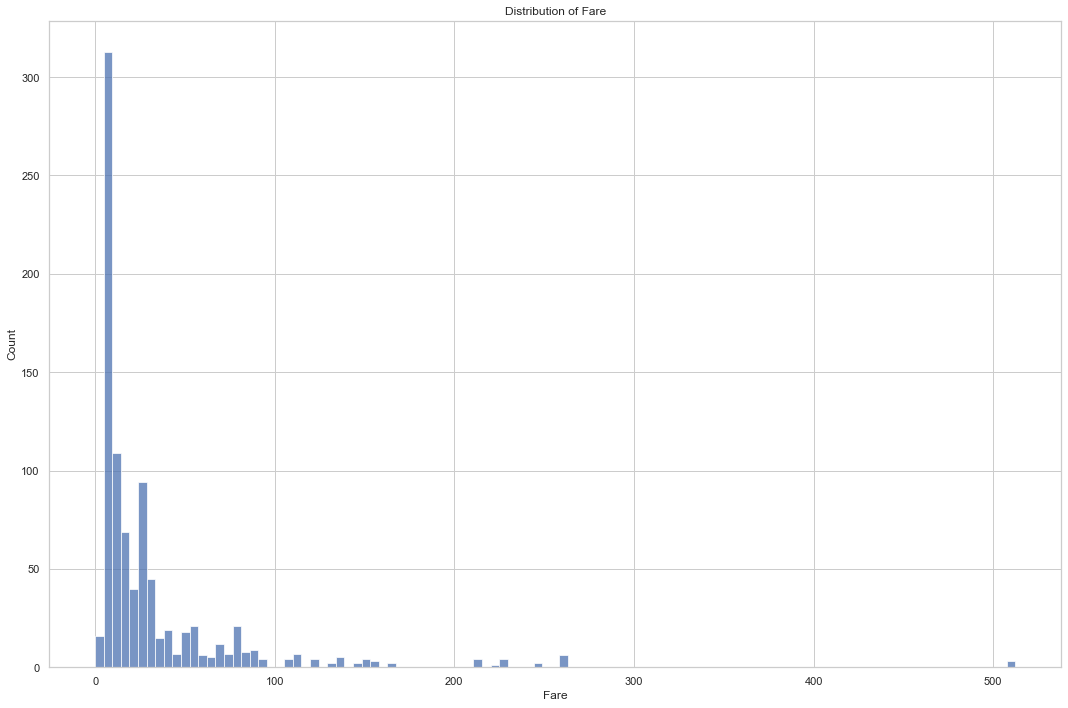

In [15]:
# Univariate analysis of numerical features

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Fare'])
plt.title(f'Distribution of Fare')
plt.tight_layout()
plt.show()

From the histogram above there seems to be an outlier in the fare prices. Further research can be done to establish how much the fare costed to prove the outlier. After research, the average first class ticket costed roughly 400 dollars, hence there may have been a typing error to have a ticket costing more than 500 dollars. 
The outlier will be removed.  

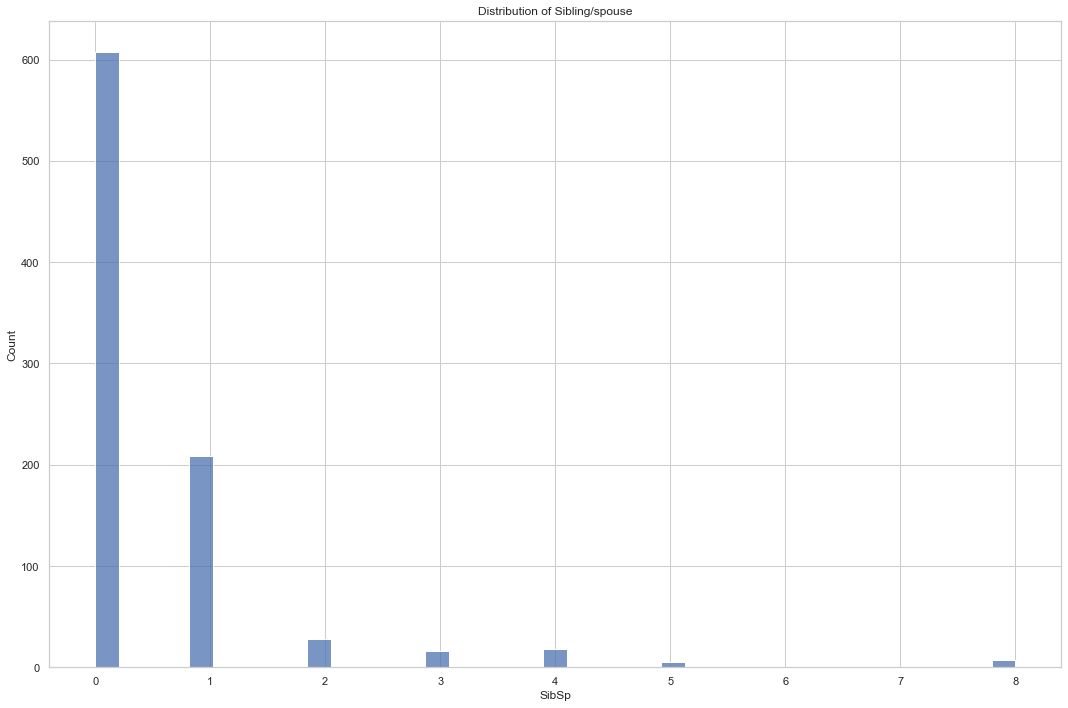

In [16]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['SibSp'])
plt.title(f'Distribution of Sibling/spouse')
plt.tight_layout()
plt.show()

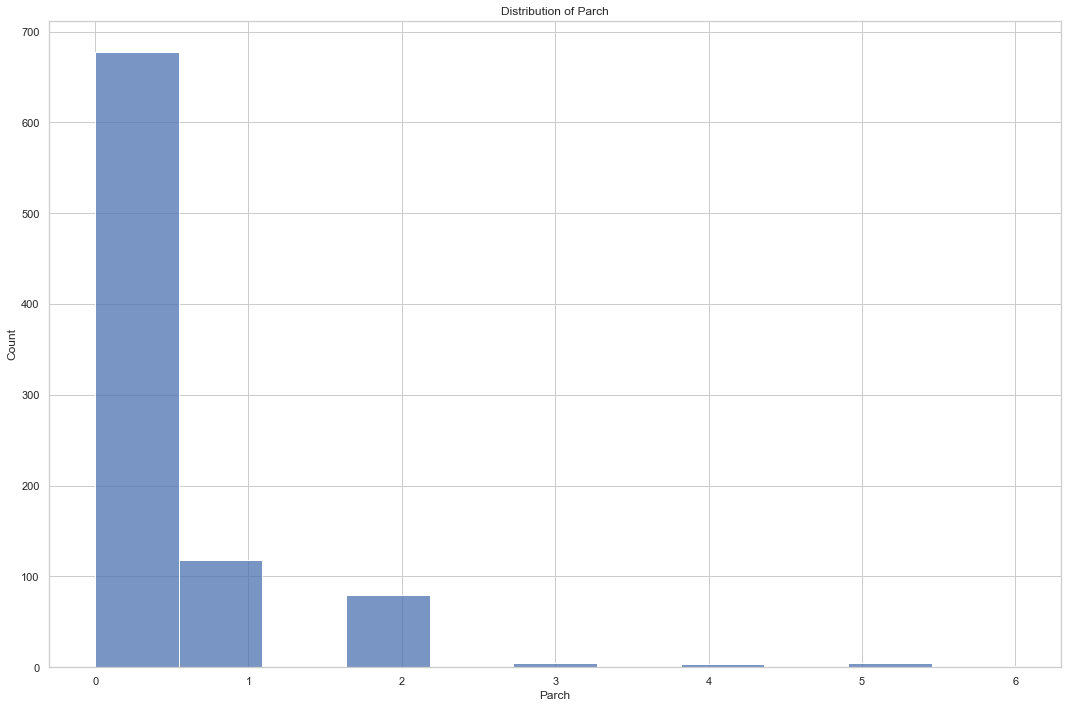

In [17]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Parch'])
plt.title(f'Distribution of Parch')
plt.tight_layout()
plt.show()

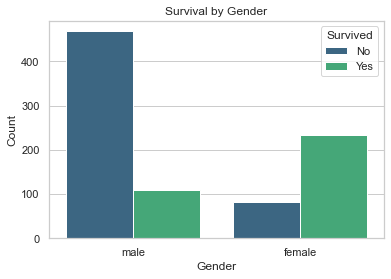

In [18]:
#bivariate analysis
# Visualize survival rates by gender
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


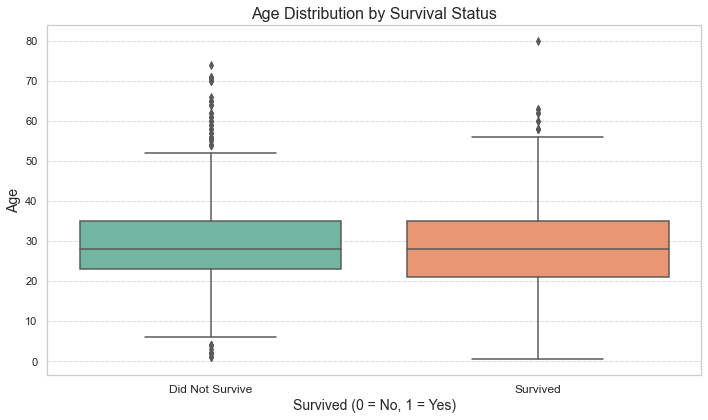

In [19]:
# Boxplot to compare age distribution of survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette='Set2')

# Customizing the plot
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()